In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data=pd.read_csv(r'D:\Devi\ICT_TVM\CASE STUDY\Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [5]:
# checking for null data in the dataset
nullData=data.isnull()
nullSum=nullData.sum()
nullSum

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

## The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.


### Setting Hypothesis

H0: There is no difference in sale before and after stepping into digital marketing

H1: There is difference in sale before and after stepping into digital marketing

In [14]:
b_sales=data['Sales_before_digital_add(in $)']
a_sales=data['Sales_After_digital_add(in $)']
alpha=.05

In [15]:
# import ttset module
from scipy.stats import ttest_ind


In [16]:
_,p = ttest_ind(b_sales,a_sales)
print("p value :", p)
if p < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0.")

p value : 2.614368006904645e-16
Reject H0


The P value is greater than alpha ie we can reject H0. From this we can accept the alternative Hypothesis ie there is significant change in sale after entering into digital marketing

## The company needs to check whether there is any dependency between the features “Region” and “Manager”.

H0 : Manager and Region are independant on each other

H1 : Manager and Region depends upon each other

In [65]:
data_m=data['Manager']
data_r=data['Region']

In [66]:
dfcrosstable=pd.crosstab(data_m,data_r)
dfcrosstable

Region,Region - A,Region - B,Region - C
Manager,,,
Manager - A,4,4,1
Manager - B,3,1,3
Manager - C,3,2,1


In [67]:

from scipy.stats import chi2_contingency
  
# defining the table

stat, p, dof, expected = chi2_contingency(dfcrosstable)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.5493991051158094
Independent (H0 holds true)


P value is greater than alpha so we can accept the null hypothesis, ie Managers and Regions are independant on each other

C:\Users\Akhil\AppData\Local\Temp\ipykernel_18948\2186013142.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new=data.groupby(by= ['Manager','Region'])['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)'].mean().plot(kind ='bar')


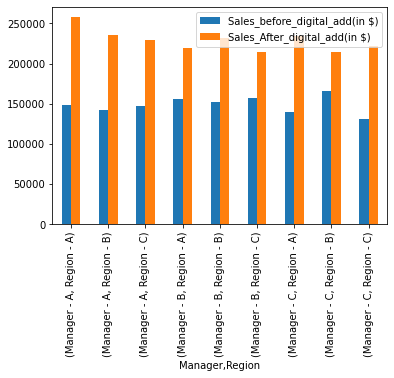

<Figure size 1440x1440 with 0 Axes>

In [64]:

new=data.groupby(by= ['Manager','Region'])['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)'].mean().plot(kind ='bar')
plt.figure(figsize=(20,20))
plt.show()